From  many days I have been thinking if I were to start my own business what would be it?.My Answer is Bakery.I love cooking and I am a foodie.So I will try to get some insights from this Dataset.This is a work in process and I will be updating the Kernel in coming days.If you like my work please do vote.

The data belongs to a bakery called "The Bread Basket", located in the historic center of Edinburgh. This bakery presents a refreshing offer of Argentine and Spanish products.

In [2]:
import numpy as np
import pandas as pd

## Importing the modules needed 

In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


## Importing the data

In [4]:
Bak=pd.read_csv('Downloads/bread basket.csv')

## Displaying the data

In [5]:
Bak.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


We can see that the dataset has data of Data,Time,Transaction and the item sold at the bakery.

In [6]:
Bak.shape

(20507, 5)

## Inspecting the data

In [7]:
Bak.isnull().sum()

Transaction        0
Item               0
date_time          0
period_day         0
weekday_weekend    0
dtype: int64

Now we can see that there are no Items with NONE in the dataset

## Dropping none values from the dataset

In [8]:
Bak['date_time']=pd.to_datetime(Bak['date_time'])

In [9]:
Bak['date']=Bak['date_time'].dt.date
Bak['time']=Bak['date_time'].dt.time
Bak['month']=Bak['date_time'].dt.month
Bak['day']=Bak['date_time'].dt.weekday
Bak['hour']=Bak['date_time'].dt.hour

In [10]:
Bak['month'] = Bak['month'].replace((1,2,3,4,5,6,7,8,9,10,11,12), 
                                          ('January','February','March','April','May','June','July','August',
                                          'September','October','November','December'))

In [11]:
Bak['day'] = Bak['day'].replace((0,1,2,3,4,5,6), 
                                          ('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'))

In [12]:
Bak.drop('date_time', axis = 1, inplace = True)

In [13]:
Bak.head()

,Transaction,Item,period_day,weekday_weekend,date,time,month,day,hour
0,1,Bread,morning,weekend,2016-10-30,09:58:00,October,Sunday,9
1,2,Scandinavian,morning,weekend,2016-10-30,10:05:00,October,Sunday,10
2,2,Scandinavian,morning,weekend,2016-10-30,10:05:00,October,Sunday,10
3,3,Hot chocolate,morning,weekend,2016-10-30,10:07:00,October,Sunday,10
4,3,Jam,morning,weekend,2016-10-30,10:07:00,October,Sunday,10


## Finding out the items that are sold at the Bakery

In [14]:
print('Total number of Items sold at the bakery is:',Bak['Item'].nunique())

Total number of Items sold at the bakery is: 94


In [15]:
print('List of Items sold at the bakery:')
Bak['Item'].unique()

List of Items sold at the bakery:


array(['Bread', 'Scandinavian', 'Hot chocolate', 'Jam', 'Cookies',
       'Muffin', 'Coffee', 'Pastry', 'Medialuna', 'Tea', 'Tartine',
       'Basket', 'Mineral water', 'Farm House', 'Fudge', 'Juice',
       "Ella's Kitchen Pouches", 'Victorian Sponge', 'Frittata',
       'Hearty & Seasonal', 'Soup', 'Pick and Mix Bowls', 'Smoothies',
       'Cake', 'Mighty Protein', 'Chicken sand', 'Coke',
       'My-5 Fruit Shoot', 'Focaccia', 'Sandwich', 'Alfajores', 'Eggs',
       'Brownie', 'Dulce de Leche', 'Honey', 'The BART', 'Granola',
       'Fairy Doors', 'Empanadas', 'Keeping It Local', 'Art Tray',
       'Bowl Nic Pitt', 'Bread Pudding', 'Adjustment', 'Truffles',
       'Chimichurri Oil', 'Bacon', 'Spread', 'Kids biscuit', 'Siblings',
       'Caramel bites', 'Jammie Dodgers', 'Tiffin', 'Olum & polenta',
       'Polenta', 'The Nomad', 'Hack the stack', 'Bakewell',
       'Lemon and coconut', 'Toast', 'Scone', 'Crepes', 'Vegan mincepie',
       'Bare Popcorn', 'Muesli', 'Crisps', 'Pintxos', 

In [16]:
text = Bak['Item'].value_counts().to_dict()
text

{'Coffee': 5471,
 'Bread': 3325,
 'Tea': 1435,
 'Cake': 1025,
 'Pastry': 856,
 'Sandwich': 771,
 'Medialuna': 616,
 'Hot chocolate': 590,
 'Cookies': 540,
 'Brownie': 379,
 'Farm House': 374,
 'Muffin': 370,
 'Alfajores': 369,
 'Juice': 369,
 'Soup': 342,
 'Scone': 327,
 'Toast': 318,
 'Scandinavian': 277,
 'Truffles': 193,
 'Coke': 185,
 'Spanish Brunch': 172,
 'Fudge': 159,
 'Baguette': 152,
 'Jam': 149,
 'Tiffin': 146,
 'Mineral water': 136,
 'Jammie Dodgers': 125,
 'Chicken Stew': 123,
 'Hearty & Seasonal': 107,
 'Salad': 99,
 'Frittata': 81,
 'Smoothies': 77,
 'Keeping It Local': 63,
 'The Nomad': 58,
 'Vegan mincepie': 54,
 'Focaccia': 54,
 'Bakewell': 48,
 'Tartine': 47,
 'Afternoon with the baker': 44,
 'Art Tray': 38,
 'Extra Salami or Feta': 38,
 'Eggs': 28,
 'Granola': 28,
 'Tshirt': 21,
 'My-5 Fruit Shoot': 18,
 "Ella's Kitchen Pouches": 17,
 'Vegan Feast': 16,
 'Crisps': 14,
 'Dulce de Leche': 13,
 "Valentine's card": 13,
 'Duck egg': 12,
 'Kids biscuit': 12,
 'Pick and Mi

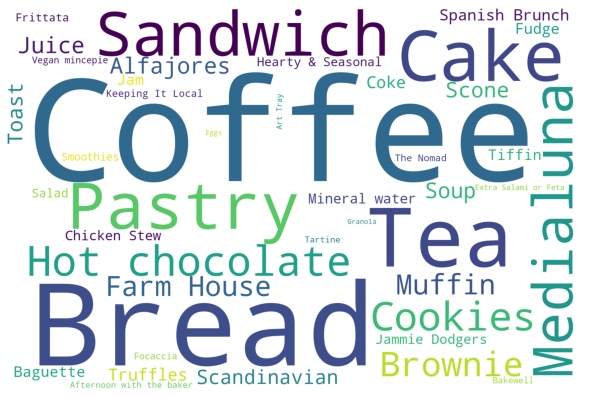

In [17]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 1800, height = 1200,
                background_color ='white',
                stopwords = stopwords,
                max_words=200,
                min_font_size = 20).generate_from_frequencies(text)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [18]:
print('List of Items sold at the Bakery:\n')
for item in set(Bak['Item']):
    print(item)

List of Items sold at the Bakery:

Drinking chocolate spoons 
Coffee granules 
Brioche and salami
The BART
Empanadas
Truffles
Gift voucher
Art Tray
Mineral water
Siblings
Spread
My-5 Fruit Shoot
Crepes
Fudge
Scone
Focaccia
Chicken Stew
Christmas common
Cake
Raw bars
Brownie
Caramel bites
Mighty Protein
Ella's Kitchen Pouches
Jam
Tiffin
Muffin
Chocolates
Muesli
Victorian Sponge
Juice
Medialuna
Bare Popcorn
Polenta
Dulce de Leche
Tea
Panatone
Bread Pudding
Afternoon with the baker
Chicken sand
Basket
Eggs
Farm House
Coke
Postcard
Argentina Night
Hack the stack
Baguette
Pintxos
Half slice Monster 
Spanish Brunch
Mortimer
Jammie Dodgers
Salad
Chimichurri Oil
Tartine
Gingerbread syrup
Vegan mincepie
Raspberry shortbread sandwich
Tshirt
Pick and Mix Bowls
Kids biscuit
Olum & polenta
Cherry me Dried fruit
Extra Salami or Feta
Bread
The Nomad
Toast
Alfajores
Hearty & Seasonal
Nomad bag
Hot chocolate
Bacon
Sandwich
Vegan Feast
Lemon and coconut
Honey
Bowl Nic Pitt
Keeping It Local
Bakewell
Cris

In [19]:
print('Ten Most Sold Items At The Bakery')
Bak['Item'].value_counts().head(10)

Ten Most Sold Items At The Bakery


Coffee           5471
Bread            3325
Tea              1435
Cake             1025
Pastry            856
Sandwich          771
Medialuna         616
Hot chocolate     590
Cookies           540
Brownie           379
Name: Item, dtype: int64

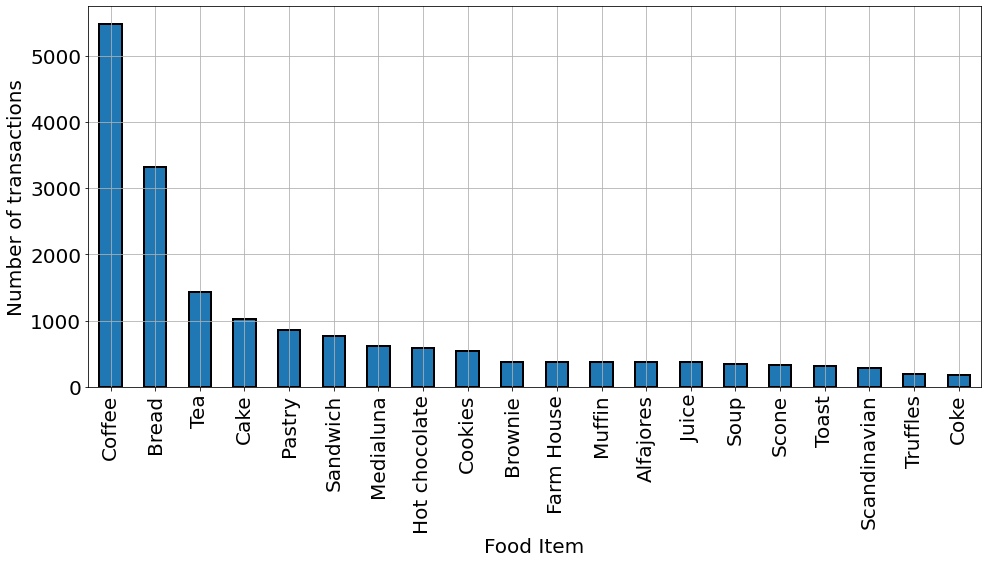

In [20]:
fig, ax=plt.subplots(figsize=(16,7))
Bak['Item'].value_counts().sort_values(ascending=False).head(20).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('Food Item',fontsize=20)
plt.ylabel('Number of transactions',fontsize=20)
ax.tick_params(labelsize=20)
#plt.title('20 Most Sold Items at the Bakery',fontsize=25)
plt.grid()
plt.ioff()

Coffee,Bread,Tea,Cake and Pastry are the most sold item at the bakery.Just like in any business we can see that out of 94 items 3 items contribute to close to 50% of the sales.This is Pareto's principle at play in the Bakery Business.

## Business during different times of the day

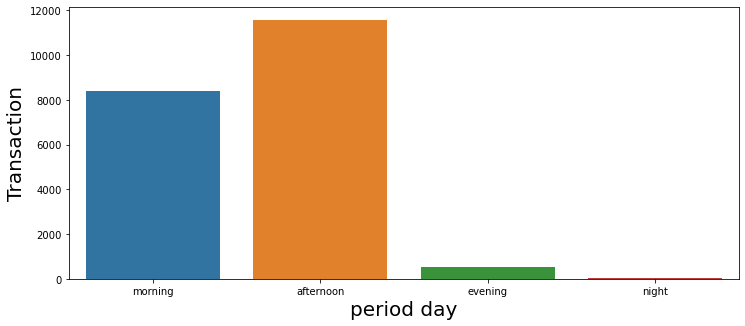

In [34]:
coutbyweekday=Bak.groupby('period_day')['Transaction'].count().reset_index()
coutbyweekday.sort_values('period_day',inplace=True)


plt.figure(figsize=(12,5))
sns.countplot(Bak['period_day'])
plt.xlabel('period day',fontsize=20)
plt.ylabel('Transaction',fontsize=20)
#plt.title('Sales uring different period of the day',fontsize=25)
plt.show()

Morning upto 12 pm ,Afternoon 12-5 pm,Evening 5-8 pm and Night 8-11.30 pm.We can see from the above plot that the maximum sales happen in the afternoon followed by morning.Evening and Night sales is very less.I am wondering why sales are less in evening and night?.This could be because in cold countries people are reluctant to step out of house in evening and night.

## Sales on different days of the week

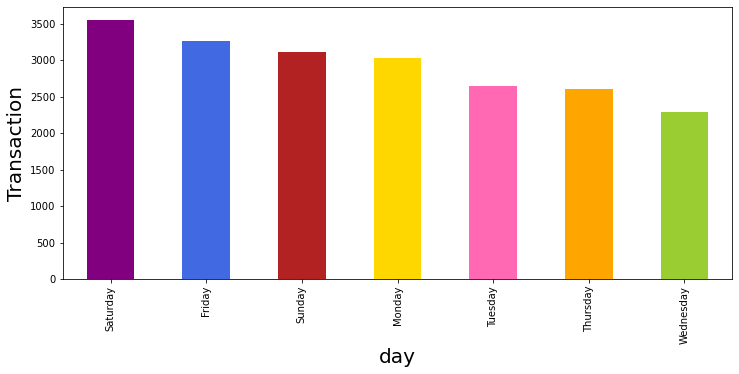

In [40]:
coutbydayp=Bak.groupby('day')['Transaction'].count().reset_index()
#coutbydayp.sort_values('day',inplace=True)

plt.figure(figsize=(12,5))
Bak['day'].value_counts(dropna = False).plot.bar(color=["purple","royalblue","firebrick","gold","hotpink","orange","yellowgreen"])
plt.xlabel('day',fontsize=20)
plt.ylabel('Transaction',fontsize=20)
#plt.title('Transaction per day of the week',fontsize=25)
plt.show()

We can see that maximum sales take place on saturday.This could be beacuse more tourist visit the bakery on weekends.

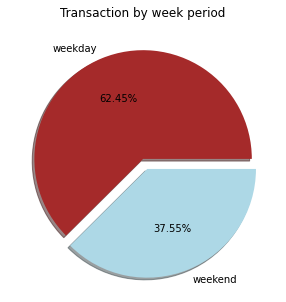

In [23]:
size = [12807, 7700]
labels = "weekday", "weekend"
colors = ["brown", "lightblue"]
explode = [0, 0.1]


plt.figure(figsize=(12,5))
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, autopct = "%.2f%%")
#plt.xlabel('weekday_weekend')
#plt.ylabel('Transaction')
plt.title('Transaction by week period')
plt.show()

## Sales on different Months of the year

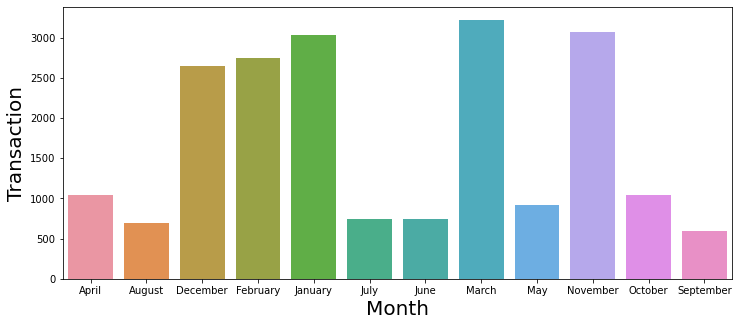

In [42]:
coutbymonth=Bak.groupby('month')['Transaction'].count().reset_index()
coutbymonth.sort_values('month',inplace=True)

fig = plt.figure(figsize=(12,5))
sns.barplot(x=coutbymonth['month'], y=coutbymonth['Transaction'])
plt.xlabel('Month',fontsize=20)
plt.ylabel('Transaction',fontsize=20)
#plt.title('Transaction per month',fontsize=25)
plt.show()

We see that highest sale was in month of March.

## Association Rule Mining via Apriori Algorithm 
Apriori algorithm was proposed by Agrawal and Srikant in 1994. Apriori is designed to operate on databases containing transactions (for example, collections of items bought by customers, or details of a website frequentation or IP addresses).This algorithm is used to find out the association between the items brought at the bakery.Generally transactions have a pattern and finding out the pattern helps us to increase business.For example mothers with babies generally buy milk and diapers together.So at the mall or supermarket if we keep milk and diapers together this can increase our sales.Support,Confidence and Lift are the three important terms used in Apriori Algorithm.

For example in a mall we have total of 1000 transactions.Out  of this in 150 transcations beer is purchased and 100 times chips is purchased.Beer and Chips are brough together 50 times.We can calculate support,confidence and lift for this case as follows 

**Support**

Support (Chips))=Transactions containing(Chips)/Total transcations

Support(Beer)=100/1000
                         =10%
                         
**Confidence**

Confidence(Beer-->Chips)=Transcations containing both (Beer and Chips)/Transcations containing Beer

Confidence(Beer-->Chips)=50/150
                                              =33.3%
                                              
** Lift **

 Lift(Beer-->Chips)=Confidence(Beer-->Chips)/Support(Chips)
 
  Lift(Beer-->Chips)=33.3/10
                                  =3.3

## Importing the modules for Apriori algorithm

In [25]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [26]:
hot_encoded_Bak=Bak.groupby(['Transaction','Item'])['Item'].count().unstack().reset_index().fillna(0).set_index('Transaction')
#Above line of code is transfrom data to make items as columns and each transaction as a row and count same Items bought in one transaction but fill other cloumns of the row with 0 to represent item which are not bought.

In [27]:
hot_encoded_Bak

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9682,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Each row represents a transaction and column represents an item.Zero means no purchase and one means an item is purchased.

## Encoding the data set

In [28]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
hot_encoded_Bak = hot_encoded_Bak.applymap(encode_units)


In [29]:
frequent_itemsets = apriori(hot_encoded_Bak, min_support=0.01, use_colnames=True)

In [30]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Coffee),(Alfajores),0.478394,0.036344,0.019651,0.041078,1.130235,0.002264,1.004936
1,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
2,(Bread),(Pastry),0.327205,0.086107,0.029160,0.089119,1.034977,0.000985,1.003306
3,(Pastry),(Bread),0.086107,0.327205,0.029160,0.338650,1.034977,0.000985,1.017305
4,(Coffee),(Brownie),0.478394,0.040042,0.019651,0.041078,1.025860,0.000495,1.001080
5,(Brownie),(Coffee),0.040042,0.478394,0.019651,0.490765,1.025860,0.000495,1.024293
6,(Coffee),(Cake),0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905
7,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
8,(Cake),(Hot chocolate),0.103856,0.058320,0.011410,0.109868,1.883874,0.005354,1.057910
9,(Hot chocolate),(Cake),0.058320,0.103856,0.011410,0.195652,1.883874,0.005354,1.114125


In [31]:
rules.sort_values('confidence', ascending = False, inplace=True)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
31,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
29,(Spanish Brunch),(Coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235
19,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
23,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
1,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
17,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
25,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
7,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
27,(Scone),(Coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366
13,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174


In [32]:
rules[ (rules['lift'] >= 1.17) &
       (rules['confidence'] >= 0.5) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
31,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
29,(Spanish Brunch),(Coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235
19,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871


The combition of toast and coffee has the maximum lift of 1.48.This means most cases people buying toast also buy coffee.Support 0.023 means that 2.3% of the transaction contains toast..Confidence of 0.70 means 70% of the toast purchases are accompanied with coffee..Lift 1.47 means that coffee is 1.47 times more likely to be brought when toast is brought.